# Challenge Set 1:  MTA Turnstile Data

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import datetime

#### Exercise 1.1

- Open up a new Jupyter notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it, make a python dict where
  there is a key for each (C/A, UNIT, SCP, STATION). These are the
  first four columns. The value for this key should be a list of
  lists. Each list in the list is the rest of the columns in a
  row. For example, one key-value pair should look like


{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],
['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],
['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
...
]
}

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    # base url
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        # concat our week onto url.. 
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170610, 170617, 170624, 170701]
turnstiles_df = get_data(week_nums)

In [4]:
# aha!  an example where we do not have a unique index ??  hmmm..  
len(turnstiles_df)

789677

In [5]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197416,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,07:17:19,REGULAR,5554,301
197417,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,09:00:00,REGULAR,5554,301
197418,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,13:00:00,REGULAR,5554,301
197419,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,17:00:00,REGULAR,5554,301
197420,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/30/2017,21:00:00,REGULAR,5554,301


In [6]:
turnstiles_df.loc[1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,04:00:00,REGULAR,6233696,2110445


In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# major space issue on exits
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401



#### Exercise 1.2

- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and
 station of a specific turnstile), have a list again, but let the list
 be comprised of just the point in time and the count of entries.

**This basically means keeping only the date, time, and entries fields
in each list.** You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Your new dict should look something like

{    ('A002','R051','02-00-00','LEXINGTON AVE'):
[
[datetime.datetime(2013, 3, 2, 3, 0), 3788],
[datetime.datetime(2013, 3, 2, 7, 0), 2585],
[datetime.datetime(2013, 3, 2, 12, 0), 10653],
[datetime.datetime(2013, 3, 2, 17, 0), 11016],
[datetime.datetime(2013, 3, 2, 23, 0), 10666],
[datetime.datetime(2013, 3, 3, 3, 0), 10814],
[datetime.datetime(2013, 3, 3, 7, 0), 10229],
...
],
....
}

In [11]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
from datetime import datetime as dt

In [13]:
# develop filter, .. 
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401


In [14]:
# Convert date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " +turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [15]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,00:00:00,REGULAR,6203652,2101226,2017-06-03 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,04:00:00,REGULAR,6203674,2101230,2017-06-03 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,08:00:00,REGULAR,6203688,2101260,2017-06-03 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,12:00:00,REGULAR,6203769,2101343,2017-06-03 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/03/2017,16:00:00,REGULAR,6203987,2101401,2017-06-03 16:00:00


In [16]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
713692,R518,R261,00-03-02,40 ST LOWERY ST,2017-06-05 08:00:00,2
526442,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 00:00:00,1
526443,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 04:00:00,1
526444,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 08:00:00,1
526445,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 12:00:00,1


In [17]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "R518") & 
(turnstiles_df["UNIT"] == "R261") & 
(turnstiles_df["SCP"] == "00-03-02") & 
(turnstiles_df["STATION"] == "40 ST LOWERY ST") &
# get datetime properties ~ .dt
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2017, 6, 5, 8, 0, 0).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
178843,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,00:00:00,REGULAR,18778202,7453672,2017-06-05 00:00:00
178844,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,04:00:00,REGULAR,18778218,7453692,2017-06-05 04:00:00
178845,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,08:00:00,REGULAR,18778966,7453831,2017-06-05 08:00:00
178846,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,08:00:00,RECOVR AUD,18778965,7453831,2017-06-05 08:00:00
178847,R518,R261,00-03-02,40 ST LOWERY ST,7,IRT,06/05/2017,12:00:00,REGULAR,18780198,7454059,2017-06-05 12:00:00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [18]:
turnstiles_df.DESC.value_counts()

REGULAR       786980
RECOVR AUD      2697
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [19]:

turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
# Get rid of the duplicate entry
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2017-06-03 00:00:00,1
526514,R147,R033,04-00-03,TIMES SQ-42 ST,2017-06-07 20:00:00,1
526444,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 08:00:00,1
526445,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 12:00:00,1
526446,R147,R033,04-00-02,TIMES SQ-42 ST,2017-06-24 16:00:00,1


* No more duplicate Entries

#### Exercise 1.3

- **These counts are for every n hours. (What is n?) We want total daily
  entries.**

Now make it that we again have the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [21]:
# Coalesce duplicate LINENAMEs that were out of order (eg. 'CBA' becomes 'ABC')
def sort_linename(linename):
    return ''.join(sorted(linename))
turnstiles_df['LINENAME'] = turnstiles_df.LINENAME.apply(sort_linename)

In [22]:
# returns a series
turnstiles_hourly = turnstiles_df.groupby\
                (["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DATE", "TIME", "DATE_TIME"])\
                ['ENTRIES','EXITS'].first().reset_index()

In [23]:
# define three new columns using 
turnstiles_hourly[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_hourly
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [24]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,00:00:00,2017-06-03 00:00:00,6203652,2101226,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0
2,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0
3,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0
4,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0


In [25]:
# Drop rows for first date
turnstiles_hourly.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [26]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0
2,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0
3,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0
4,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0
5,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,20:00:00,2017-06-03 20:00:00,6204271,2101450,2017-06-03 16:00:00,6203987.0,2101401.0


In [27]:
# sanity check : when are previous entries greater than current ? 
turnstiles_hourly[turnstiles_hourly["ENTRIES"] < turnstiles_hourly["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2447,A006,R079,00-00-02,5 AV/59 ST,NQRW,06/18/2017,14:00:00,2017-06-18 14:00:00,5439480,16169264,2017-06-18 10:00:00,7807254.0,3433327.0
5720,A011,R080,01-00-00,57 ST-7 AV,NQRW,06/03/2017,04:00:00,2017-06-03 04:00:00,886917698,492571284,2017-06-03 00:00:00,886917876.0,492571326.0
5721,A011,R080,01-00-00,57 ST-7 AV,NQRW,06/03/2017,08:00:00,2017-06-03 08:00:00,886917638,492570955,2017-06-03 04:00:00,886917698.0,492571284.0
5722,A011,R080,01-00-00,57 ST-7 AV,NQRW,06/03/2017,12:00:00,2017-06-03 12:00:00,886917354,492570248,2017-06-03 08:00:00,886917638.0,492570955.0
5723,A011,R080,01-00-00,57 ST-7 AV,NQRW,06/03/2017,16:00:00,2017-06-03 16:00:00,886916793,492569519,2017-06-03 12:00:00,886917354.0,492570248.0


In [28]:
# What's the deal with counter going in reverse ? 
# investigate this with turnstiles_df
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2017, 6, 3).date()))
turnstiles_df[mask].head()

# entries going up, datetime going down

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,20:00:00,REGULAR,886916139,492568911,2017-06-03 20:00:00
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,16:00:00,REGULAR,886916793,492569519,2017-06-03 16:00:00
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,12:00:00,REGULAR,886917354,492570248,2017-06-03 12:00:00
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,08:00:00,REGULAR,886917638,492570955,2017-06-03 08:00:00
1429,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,06/03/2017,04:00:00,REGULAR,886917698,492571284,2017-06-03 04:00:00


* Counter working in Reverse??? - WHHHAT

In [29]:
# Let's see how many stations have this problem

(turnstiles_hourly[turnstiles_hourly["ENTRIES"] < turnstiles_hourly["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A006   R079  00-00-02  5 AV/59 ST           1
A011   R080  01-00-00  57 ST-7 AV         170
A025   R023  01-03-01  34 ST-HERALD SQ    167
             01-03-02  34 ST-HERALD SQ    165
A043   R462  00-06-00  CANAL ST             2
A049   R088  02-05-00  CORTLANDT ST        40
A060   R001  00-00-02  WHITEHALL S-FRY      1
             00-00-04  WHITEHALL S-FRY      1
             00-00-06  WHITEHALL S-FRY      1
A066   R118  00-00-00  CANAL ST           167
B020   R263  00-05-00  AVENUE H             1
B025   R150  00-00-01  AVENUE U             1
C021   R212  00-00-02  59 ST              178
E011   R371  00-06-01  79 ST                1
H003   R163  01-00-02  6 AV               166
H009   R235  00-06-05  BEDFORD AV           1
H023   R236  00-06-00  DEKALB AV          167
J034   R007  00-00-02  104 ST             124
JFK01  R535  00-00-02  HOWARD BCH JFK       1
JFK02  R535  01-00-03  HOWARD BCH JFK       1
JFK03  R536  00-03-00  JFK JAMAICA CT1   

In [30]:
def get_counts(row, max_counter, col_name):
    counter = row[col_name] - row["PREV_"+col_name]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
#         print(row[col_name], row["PREV_"+col_name])
        counter = min(row[col_name], row["PREV_"+col_name])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

In [31]:
# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_hourly["HOURLY_ENTRIES"] = turnstiles_hourly.apply(get_counts, col_name='ENTRIES', axis=1, max_counter=10000)
turnstiles_hourly["HOURLY_EXITS"] = turnstiles_hourly.apply(get_counts, col_name='EXITS', axis=1, max_counter=10000)

In [32]:
turnstiles_hourly['TOTAL_TRAFFIC'] = turnstiles_hourly.HOURLY_ENTRIES + turnstiles_hourly.HOURLY_EXITS
turnstiles_hourly['DT_DIFF'] = turnstiles_hourly.DATE_TIME - turnstiles_hourly.PREV_DATE
turnstiles_hourly['DOW'] = turnstiles_hourly['DATE_TIME'].dt.weekday_name

# Create WEEKEND field
weekend_indices = turnstiles_hourly[(turnstiles_hourly.DOW == 'Saturday') | (turnstiles_hourly.DOW == 'Sunday')].index
weekday_indices = turnstiles_hourly[(turnstiles_hourly.DOW != 'Saturday') & (turnstiles_hourly.DOW != 'Sunday')].index
turnstiles_hourly.loc[weekend_indices, 'WEEKEND'] = 'Weekend'
turnstiles_hourly.loc[weekday_indices, 'WEEKEND'] = 'Weekday'

In [33]:
# Turn TIME from string to timestamp
turnstiles_hourly['TIME'] = turnstiles_hourly['TIME']. \
    apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').time())

In [34]:
AM_indices = turnstiles_hourly[turnstiles_hourly.TIME < datetime.time(14,0)].index
PM_indices = turnstiles_hourly[turnstiles_hourly.TIME >= datetime.time(14,0)].index
turnstiles_hourly.loc[AM_indices, 'TOD'] = 'AM'
turnstiles_hourly.loc[PM_indices, 'TOD'] = 'PM'

In [35]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,HOURLY_ENTRIES,HOURLY_EXITS,TOTAL_TRAFFIC,DT_DIFF,DOW,WEEKEND,TOD
1,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,04:00:00,2017-06-03 04:00:00,6203674,2101230,2017-06-03 00:00:00,6203652.0,2101226.0,22.0,4.0,26.0,04:00:00,Saturday,Weekend,AM
2,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,08:00:00,2017-06-03 08:00:00,6203688,2101260,2017-06-03 04:00:00,6203674.0,2101230.0,14.0,30.0,44.0,04:00:00,Saturday,Weekend,AM
3,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,12:00:00,2017-06-03 12:00:00,6203769,2101343,2017-06-03 08:00:00,6203688.0,2101260.0,81.0,83.0,164.0,04:00:00,Saturday,Weekend,AM
4,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,16:00:00,2017-06-03 16:00:00,6203987,2101401,2017-06-03 12:00:00,6203769.0,2101343.0,218.0,58.0,276.0,04:00:00,Saturday,Weekend,PM
5,A002,R051,02-00-00,59 ST,456NQRW,06/03/2017,20:00:00,2017-06-03 20:00:00,6204271,2101450,2017-06-03 16:00:00,6203987.0,2101401.0,284.0,49.0,333.0,04:00:00,Saturday,Weekend,PM


In [ ]:
turnstiles_hourly.groupby(['TOD', ])

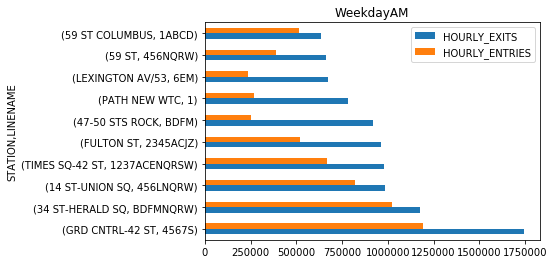

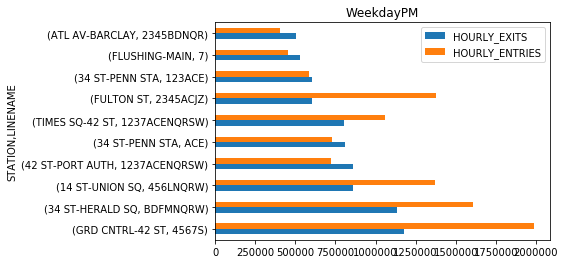

In [38]:
# Plots for top trafficked stations by time period
for day in ['Weekday']:
    for tod in ['AM','PM']:
        mask = ((turnstiles_hourly.WEEKEND == day) 
            & (turnstiles_hourly.TOD == tod)
        #    & (turnstiles_hourly.DT_DIFF == pd.Timedelta('4 hours'))
               )
        df = turnstiles_hourly[mask].groupby(['STATION','LINENAME']).agg({'HOURLY_EXITS': 'sum','HOURLY_ENTRIES': 'sum'}) \
            .sort_values(by='HOURLY_EXITS', ascending=False).head(10)
        df.plot(kind='barh', title=day + tod)
#         print(day, tod, df, '\n')

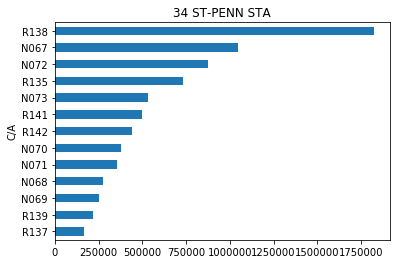

In [204]:
# Which Control Areas (C/A) get the most traffic?
station = '34 ST-PENN STA'
df = turnstiles_hourly[turnstiles_hourly.STATION==station]
df.groupby(['C/A']).TOTAL_TRAFFIC.sum().sort_values().plot(kind='barh', title=station)

### Match stations to location?

In [39]:
entrances_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')

lat_long = entrances_df.groupby(['Station_Name'])['Station_Latitude','Station_Longitude'].first()
lat_long.reset_index(inplace=True)

In [40]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [41]:
stations = turnstiles_df.STATION.unique().tolist()

lat_long['STATION'] = lat_long.Station_Name.apply(lambda x:
                                                  process.extractOne(x, stations, scorer=fuzz.token_sort_ratio)[0])
lat_long['Match Score'] = lat_long.Station_Name.apply(lambda x:
                                                  process.extractOne(x, stations, scorer=fuzz.token_sort_ratio)[1])

In [42]:
lat_long.head(10)

,Station_Name,Station_Latitude,Station_Longitude,STATION,Match Score
0,103rd St,40.796092,-73.961454,103 ST,86
1,104th St-102nd St,40.695178,-73.844330,14TH STREET,57
2,104th St-Oxford Av,40.681711,-73.837683,FOREST AVE,57
3,110th St,40.795020,-73.944250,110 ST,86
4,110th St-Central Park North,40.799075,-73.951822,CENTRAL PK N110,57
5,111th St,40.697418,-73.836345,111 ST,86
6,111th St-Greenwood Av,40.684331,-73.832163,GREENPOINT AV,59
7,116th St,40.805085,-73.954882,116 ST,86
8,116th St-Columbia University,40.807722,-73.964110,116 ST-COLUMBIA,70
9,121st St,40.700492,-73.828294,121 ST,86


### Add zip codes

In [43]:
# Add zip codes
from geopy.geocoders import Nominatim
geolocator = Nominatim()

# See an example of how this works
location = geolocator.reverse("40.697418, -73.836345")
print(location.address)
print(location.raw['address'])

112-02, Jamaica Avenue, Brooklyn Manor, Queens County, NYC, New York, 11418, United States of America
{'house_number': '112-02', 'road': 'Jamaica Avenue', 'neighbourhood': 'Brooklyn Manor', 'county': 'Queens County', 'city': 'NYC', 'state': 'New York', 'postcode': '11418', 'country': 'United States of America', 'country_code': 'us'}


In [44]:
from geopy.geocoders import Nominatim

In [45]:
def find_address(lat, long):
    geolocator = Nominatim()
    latlong = str(lat) + ', ' + str(long)
    location = geolocator.reverse(latlong)
    return location.raw['address']

In [46]:
lat_long_list = []

In [48]:
# # Go by increments up to index=354, since bulk call times out
# for i in range(50,51):    
#     address = find_address(lat_long.Station_Latitude[i], lat_long.Station_Longitude[i])
#     lat_long_list.append((i, lat_long.loc[i,'Station_Name'], address))

# Bulk call that times out
lat_long['zipcode'] = lat_long.apply(lambda row: find_address(
                row['Station_Latitude'], row['Station_Longitude'])['postcode'], axis=1)

GeocoderServiceError: ('[Errno 65] No route to host', 'occurred at index 75')

In [160]:
print(len(lat_long_list))
lat_long_list[353]

354


(354,
 'Zerega Av',
 {'city': 'NYC',
  'country': 'United States of America',
  'country_code': 'us',
  'county': 'Bronx County',
  'house_number': '2359',
  'neighbourhood': 'Unionport',
  'postcode': '10462',
  'road': 'Westchester Avenue',
  'state': 'New York',
  'suburb': 'Bronx'})

In [199]:
# Add address field to lat_long
lat_long_list.sort(key=lambda x: x[0])
lat_long['address'] = lat_long_list

In [222]:
lat_long.head()

,Station_Name,Station_Latitude,Station_Longitude,STATION,Match Score,zipcode,address,suburb,neighborhood
0,103rd St,40.796092,-73.961454,103 ST,86,10025,"(0, 103rd St, {'house_number': '435', 'road': ...",Manhattan,Central Park
1,104th St-102nd St,40.695178,-73.844330,14TH STREET,57,11418,"(1, 104th St-102nd St, {'house_number': '102-2...",NaN,Brooklyn Manor
2,104th St-Oxford Av,40.681711,-73.837683,FOREST AVE,57,11417,"(2, 104th St-Oxford Av, {'house_number': '103-...",NaN,Morris Park
3,110th St,40.795020,-73.944250,110 ST,86,10029,"(3, 110th St, {'house_number': '1779', 'road':...",Manhattan,NaN
4,110th St-Central Park North,40.799075,-73.951822,CENTRAL PK N110,57,10026,"(4, 110th St-Central Park North, {'house_numbe...",Manhattan,Harlem


In [224]:
# pull fields out of address
lat_long['zipcode'] = lat_long.address.apply(lambda x: x[2]['postcode'])
lat_long['suburb'] = lat_long.address.apply(lambda x: x[2].get('suburb', np.NaN))
lat_long['neighborhood'] = lat_long.address.apply(lambda x: x[2].get('neighbourhood', np.NaN))

# Shorten zip codes
lat_long['short_zip'] = lat_long.zipcode.apply(lambda x: x[:5])

In [236]:
lat_long.to_csv('lat_long.csv')

In [252]:
# Top zip codes for Females with Science jobs
good_zips = [10016, 10023, 10024, 10025, 11211, 11215, 11375]
good_zips = [str(x) for x in good_zips]

In [253]:
top_stations = lat_long[lat_long.short_zip.apply(lambda x: x in good_zips)]

In [254]:
top_stations[['STATION','short_zip','neighborhood']].sort_values(by='short_zip')

,STATION,short_zip,neighborhood
57,33 ST,10016,Murray Hill
76,59 ST COLUMBUS,10023,Upper West Side
87,72 ST,10023,Upper West Side
0,103 ST,10025,Central Park
268,MARCY AV,11211,Williamsburg
230,HEWES ST,11211,Williamsburg
133,BEDFORD AV,11211,Williamsburg
224,GRAND ST,11211,Williamsburg
219,GRAHAM AV,11211,Williamsburg
305,15 ST-PROSPECT,11215,Windsor Terrace


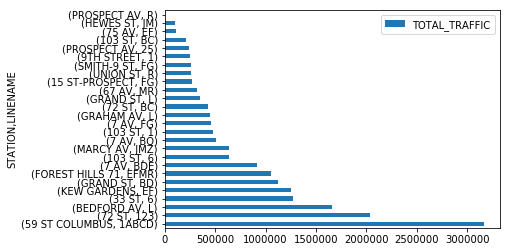

In [265]:
my_stations = top_stations.STATION
# my_zip = '11211'
# my_stations = top_stations[top_stations.short_zip==my_zip].STATION

# for station in my_stations:
mask = (turnstiles_hourly.STATION.isin(my_stations)) 
df = turnstiles_hourly[mask].groupby(['STATION','LINENAME']).agg({'TOTAL_TRAFFIC': 'sum'}) \
    .sort_values(by='TOTAL_TRAFFIC', ascending=False)
df.plot(kind='barh')


In [ ]:
('HEWES ST', 'IM'),
(75 AV, EF),
(103 ST, BC),
(SMITH-9 ST, FG),
(UNION ST, R),
(15 ST-PROSPECT, FG),
(67 AV, MR),
(GRAND ST, L),
(72 ST, BC),
(GRAHAM AV, L),
(7AV, FG),
(103 ST, 1),
(MARCY AV, IMZ),
(FOREST HILLS 71, EFMR),
(KEW GARDENS, EF),
(33 ST, 6),
(BEDFORD AV, L),
(72 ST, 123),
(59 ST COLUMBUS, 1ABCD),